In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/GTec/Dataset/Patient 2/Train'
validation_dir = '/content/drive/MyDrive/GTec/Dataset/Patient 2/Validation'

In [4]:
train_1_dir = os.path.join(train_dir, '1')
train_2_dir = os.path.join(train_dir,'2')
train_3_dir = os.path.join(train_dir, '3')

validation_1_dir = os.path.join(validation_dir, '1')
validation_2_dir = os.path.join(validation_dir,'2')
validation_3_dir = os.path.join(validation_dir, '3')

In [5]:
print(f'total training - 1 images = {len(os.listdir(train_1_dir))}')
print(f'total training - 2 images = {len(os.listdir(train_2_dir))}')
print(f'total training - 3 images = {len(os.listdir(train_3_dir))}')

print(f'total validation - 1 images = {len(os.listdir(validation_1_dir))}')
print(f'total validation - 2 images = {len(os.listdir(validation_2_dir))}')
print(f'total validation - 3 images = {len(os.listdir(validation_3_dir))}')

total training - 1 images = 1152
total training - 2 images = 1152
total training - 3 images = 1152
total validation - 1 images = 144
total validation - 2 images = 144
total validation - 3 images = 144


In [6]:
training_datagen  = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_generator = training_datagen.flow_from_directory(train_dir, batch_size = 144, target_size = (224,224),class_mode = 'categorical')
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 144, target_size = (224,224), class_mode = 'categorical')

# inputs = tf.keras.Input(shape = (224,224,3))
# x = tf.keras.layers.Conv2D(64, (3,3), activation = 'relu')(inputs)
# x = tf.keras.layers.MaxPooling2D(2,2)(x)
# x = tf.keras.layers.Conv2D(64,(3,3), activation = 'relu')(x)
# x = tf.keras.layers.MaxPooling2D(2,2)(x)
# x = tf.keras.layers.Conv2D(128, (3,3), activation = 'relu')(x)
# x = tf.keras.layers.MaxPooling2D(2,2)(x)
# x = tf.keras.layers.Conv2D(128, (3,3), activation = 'relu')(x)
# x = tf.keras.layers.MaxPooling2D(2,2)(x)
# x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dropout(0.2)(x)
# x = tf.keras.layers.Dense(512, activation = 'relu')(x)
# outputs = tf.keras.layers.Dense(3, activation = 'softmax')(x)

# model = Model(inputs = inputs, outputs = outputs)
modPath = '/content/drive/MyDrive/GTec/Models/simple_CNN_1_P2.h5'
model = tf.keras.models.load_model(modPath)
model.summary()

Found 3456 images belonging to 3 classes.
Found 432 images belonging to 3 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                            

In [7]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'] )

history = model.fit(training_generator, 
                   validation_data = validation_generator,
                   steps_per_epoch = 8,
                   epochs = 25,
                   validation_steps= 1)

Epoch 1/25
8/8 [==============================] - 455s 56s/step - loss: 1.3204 - accuracy: 0.5113 - val_loss: 0.8808 - val_accuracy: 0.5764
Epoch 2/25
8/8 [==============================] - 246s 31s/step - loss: 0.8623 - accuracy: 0.5530 - val_loss: 0.8387 - val_accuracy: 0.5417
Epoch 3/25
8/8 [==============================] - 157s 20s/step - loss: 0.8067 - accuracy: 0.6007 - val_loss: 0.8642 - val_accuracy: 0.5486
Epoch 4/25
8/8 [==============================] - 98s 12s/step - loss: 0.7838 - accuracy: 0.6016 - val_loss: 0.8032 - val_accuracy: 0.5694
Epoch 5/25
8/8 [==============================] - 77s 10s/step - loss: 0.8104 - accuracy: 0.5868 - val_loss: 0.8690 - val_accuracy: 0.5139
Epoch 6/25
8/8 [==============================] - 65s 8s/step - loss: 0.8079 - accuracy: 0.5816 - val_loss: 0.7434 - val_accuracy: 0.5903
Epoch 7/25
8/8 [==============================] - 55s 7s/step - loss: 0.7179 - accuracy: 0.6467 - val_loss: 0.9330 - val_accuracy: 0.5139
Epoch 8/25
8/8 [==========

In [ ]:
# model.save('simple_CNN.h5')

In [8]:
model.save('/content/drive/MyDrive/GTec/Models/simple_CNN_1_P2.h5')

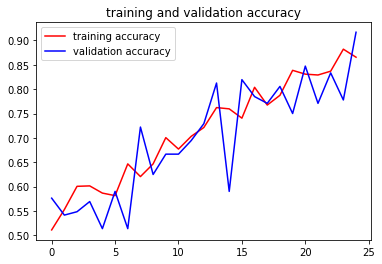

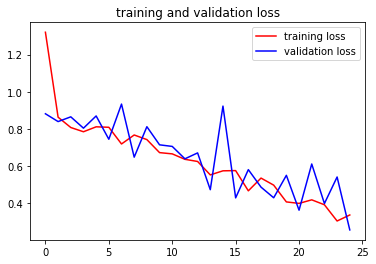

<Figure size 432x288 with 0 Axes>

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label ='validation accuracy')
plt.title('training and validation accuracy')
plt.legend(loc = 0)
plt.figure()

plt.plot(epochs, loss, 'r', label = 'training loss')
plt.plot(epochs, val_loss, 'b', label ='validation loss')
plt.title('training and validation loss')
plt.legend(loc = 0)
plt.figure()

plt.show()

In [ ]:
# # testing the model on a selected image
# import numpy as np

# path  = os.path.join('/content/drive/MyDrive/GTec/Dataset/Patient 2/Test', input())

# img = image.load_img(path, target_size= (224,224))
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis = 0)

# classes = model.predict(x)
# print(classes)

1/1_0.png
[[1.000000e+00 0.000000e+00 1.028954e-20]]


In [3]:
modPath = '/content/drive/MyDrive/GTec/Models/simple_CNN_1_P2.h5'
saved_model = tf.keras.models.load_model(modPath)
saved_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856 

In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_path = '/content/drive/MyDrive/GTec/Dataset/Patient 2/Test'

test_generator = test_datagen.flow_from_directory(test_path,
                                                     target_size = (224, 224),
                                                     batch_size = 72,
                                                     class_mode = 'categorical', shuffle = False)


Found 432 images belonging to 3 classes.


In [5]:
loss, acc = saved_model.evaluate(test_generator, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

6/6 - 80s - loss: 0.3366 - accuracy: 0.8750 - 80s/epoch - 13s/step
Restored model, accuracy: 87.50%


Classification Report:
----------------------
               precision    recall  f1-score   support

           1       0.80      0.90      0.85       144
           2       0.97      0.82      0.89       144
           3       0.88      0.90      0.89       144

    accuracy                           0.88       432
   macro avg       0.88      0.88      0.88       432
weighted avg       0.88      0.88      0.88       432



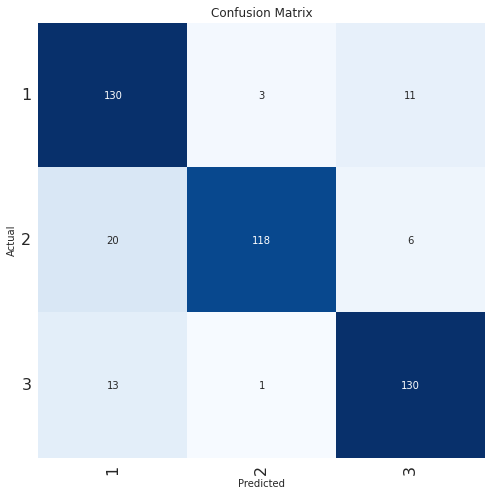

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('darkgrid')
def cm_cr(test_gen, model):
    preds=model.predict(test_gen)    
    labels=test_gen.labels
    classes=list(test_gen.class_indices.keys()) # ordered lst of class names 
    pred_list=[ ] # will store the predicted classes here
    true_list=[]
    for i, p in enumerate (preds):
        index=np.argmax(p)
        pred_list.append(classes[index])
        true_list.append(classes[labels[i]])
    y_pred=np.array(pred_list)
    y_true=np.array(true_list)
    clr = classification_report(y_true, y_pred, target_names=classes)
    print("Classification Report:\n----------------------\n", clr)
    cm = confusion_matrix(y_true, y_pred )        
    length=len(classes)
    if length<8:
        fig_width=8
        fig_height=8
    else:
        fig_width= int(length * .5)
        fig_height= int(length * .5)
    plt.figure(figsize=(fig_width, fig_height))
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
    plt.xticks(np.arange(length)+.5, classes, rotation= 90, fontsize=16)
    plt.yticks(np.arange(length)+.5, classes, rotation=0, fontsize=16)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

cm_cr(test_generator, saved_model)

In [10]:
import visualkeras

ModuleNotFoundError: ignored